In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
collar=pd.read_csv("C:/Users/TIYANI/Videos/Final/Data generation/Geomet.csv", index_col='Hole_Id')
collar

,Depth_From,Depth_To,Bond_Work,Abression,Rodmill_In,Drop_Weigh,RQD,AxB,X,Y,Z,Depth_max
Hole_Id,,,,,,,,,,,,
KRED207,0.0,10.0,0.0,0.00,0.0,0.0,0.00,0.00,530167.06,8714340.88,1330.60,104.5
KRED207,10.0,14.0,10.3,0.32,13.7,21.0,45.00,0.67,530167.06,8714340.88,1330.60,104.5
KRED207,14.0,17.2,12.0,0.02,13.8,16.0,54.74,0.32,530167.06,8714340.88,1330.60,104.5
KRED207,17.2,27.0,12.0,0.02,13.8,16.0,54.74,0.32,530167.06,8714340.88,1330.60,104.5
KRED207,27.0,31.2,12.0,0.02,13.8,16.0,54.74,0.32,530167.06,8714340.88,1330.60,104.5
...,...,...,...,...,...,...,...,...,...,...,...,...
KRED336,42.5,44.1,12.0,0.02,13.8,16.0,54.74,0.32,530250.77,8714398.72,1330.35,92.0
KRED336,44.1,49.8,19.6,0.02,4.0,6.1,16.00,0.24,530250.77,8714398.72,1330.35,92.0
KRED336,49.8,78.5,14.3,0.78,18.9,11.3,70.00,41.10,530250.77,8714398.72,1330.35,92.0


In [12]:
x = collar.values

In [13]:
print(x.shape)

(1122, 12)


In [14]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

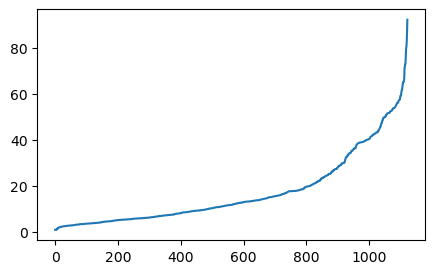

In [15]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [17]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 50, min_samples = 15).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

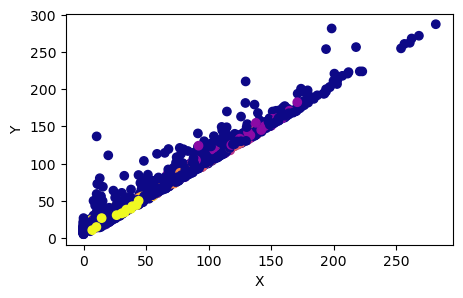

In [18]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("X") # X-axis label
plt.ylabel("Y") # Y-axis label
plt.show() # showing the plot

In [19]:
X = collar.iloc[:, :-1].values
y = collar.iloc[:, -1].values
# splitting the data into the training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature scalling
from sklearn.preprocessing import StandardScaler
stndS = StandardScaler()
X_train = stndS.fit_transform(X_train)
X_test = stndS.transform(X_test)

In [20]:
# Importing the PCA class from the decomposition module in sklearn
from sklearn.decomposition import PCA
# create a PCA object
pca = PCA(n_components = 2)# extracted features we want to end up within our new dataset(2).
# Apply the above object to our training dataset using the fit method.
X_train = pca.fit_transform(X_train)
# Apply the PCA object to the test set only to transform this set
X_test = pca.transform(X_test)

In [26]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(X_train)
encoded = lab_enc.fit_transform(y_train)
# Importing the LogisticRegression class from the linear_model module in sklearn
from sklearn.linear_model import LogisticRegression
# create object of the above classifier
clfy = LogisticRegression(random_state = 0) # pass seed to ensure results are reproducible
clfy.fit(X_train, y_train) # calls fit method from the classifier object to fit the data to our model

ValueError: y should be a 1d array, got an array of shape (897, 2) instead.

In [1]:
pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 510.3/510.3 kB 680.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
